<a href="https://colab.research.google.com/github/simsekergun/DATA601/blob/main/HW/DATA601HW05_Spring22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 5
Due Date: 12/05/2023, 11:59 pm

Please use the cell below, get the "American National Election Studies of 1996" dataset, then the answer the questions below. 35 pts

In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
anes96 = sm.datasets.anes96
df = anes96.load_pandas().data

### Questions/Tasks
1. After loading data as a dataframe, carry out a typical EDA (check the shape, data types, min/max values, etc.) (5pts)
2. Visualize the histogram of all features and the correlation matrix. (5pts)

3. Use hypothesis testing methods and which ones of these have an affect on people's votes (0: Clinton, 1:Dole) (10pts)<br>
 a. Population  <br>
 b. TVnews <br>
 c. Age <br>
 d. Education <br>
 e. Income <br>

4. Use Chi-square test of independence and answer the following quesion: If we assume that people who make less than $50k a year are poor, can we say that poor people favor one candidate over another? (5pts)

5. Use Fisher's exact test and answer the following quesion: If we assume that people who are under the age of 40 years are young, can we say that young people favor one candidate over another? (5pts)

6. Use Welch's t-test and answer the following question: is there a difference in votes between people with a higher education degree (college, MS, or PhD) and without a higher education degree? (5pts)

In [9]:
# 1. Exploratory Data Analysis (EDA)
# Check the shape, data types, min/max values, etc.
print("Shape of the DataFrame:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

# Display unique values in each column
print("\nUnique values in each column:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")


Shape of the DataFrame: (944, 11)

Data Types:
popul       float64
TVnews      float64
selfLR      float64
ClinLR      float64
DoleLR      float64
PID         float64
age         float64
educ        float64
income      float64
vote        float64
logpopul    float64
dtype: object

Summary Statistics:
             popul      TVnews      selfLR      ClinLR      DoleLR  \
count   944.000000  944.000000  944.000000  944.000000  944.000000   
mean    306.381356    3.727754    4.325212    2.939619    5.394068   
std    1082.606745    2.677235    1.438436    1.383725    1.269349   
min       0.000000    0.000000    1.000000    1.000000    1.000000   
25%       1.000000    1.000000    3.000000    2.000000    5.000000   
50%      22.000000    3.000000    4.000000    3.000000    6.000000   
75%     110.000000    7.000000    6.000000    4.000000    6.000000   
max    7300.000000    7.000000    7.000000    7.000000    7.000000   

              PID         age        educ      income        vote  

<Figure size 1500x800 with 0 Axes>

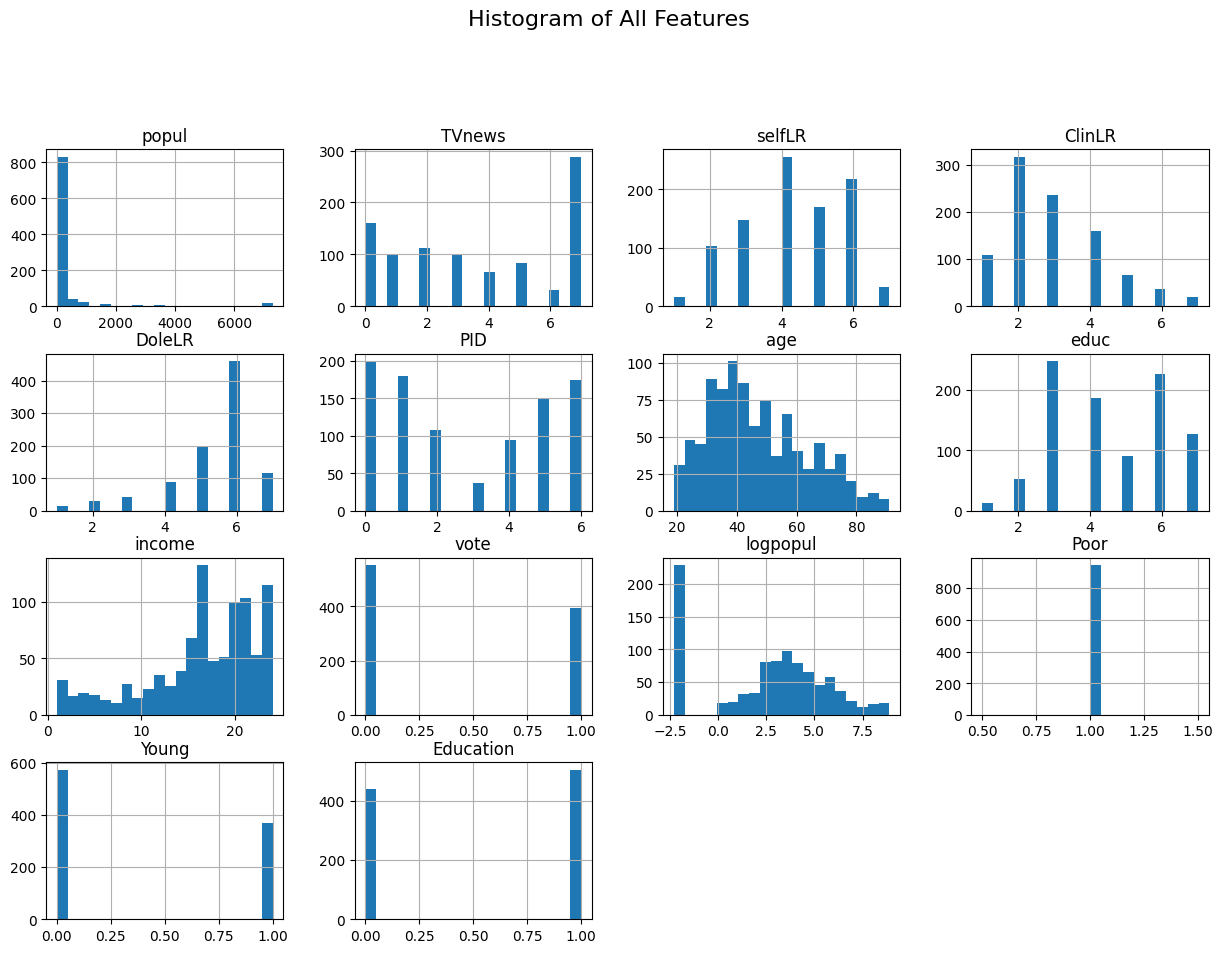

In [20]:
# 2. Visualize the histogram of all features and the correlation matrix
plt.figure(figsize=(15, 8))

# Histograms
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogram of All Features', y=1.02, fontsize=16)
plt.show()

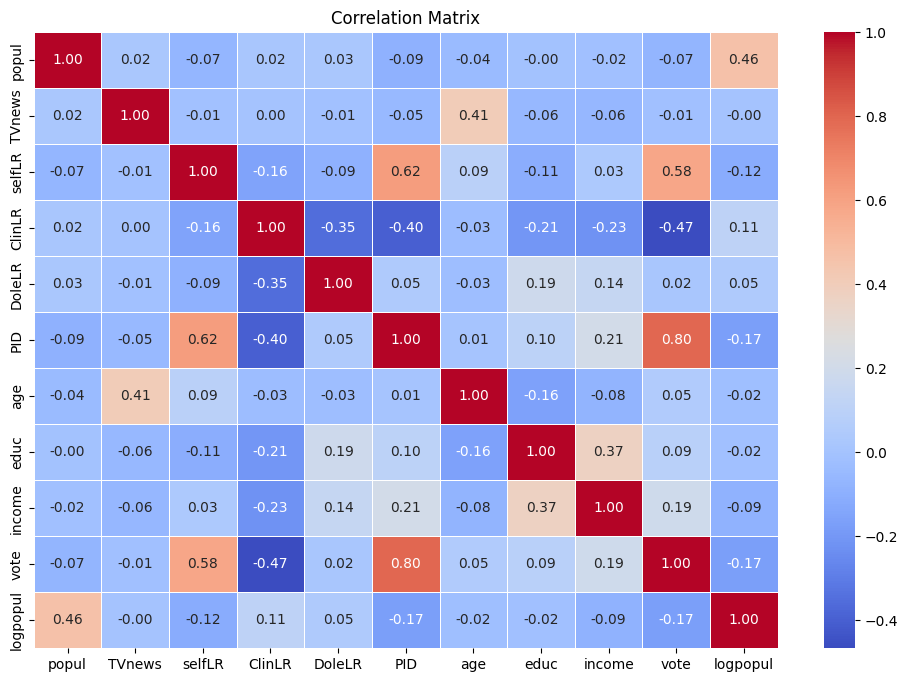

In [8]:
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [14]:
#3.Use hypothesis testing methods and which ones of these have an affect on people's votes (0: Clinton, 1:Dole) (10pts)
#a. Population
#b. TVnews
#c. Age
#d. Education
#e. Income
from scipy.stats import chi2_contingency as chi2, ttest_ind as tind, pearsonr as pear
contingency_table_pop = pd.crosstab(df['popul'], df['vote'])
chi2_stat_pop, p_value_pop, _, _ = chi2(contingency_table_pop)
print(f"P-value for Population vs Votes: {p_value_pop}")

contingency_table_tv = pd.crosstab(df['TVnews'], df['vote'])
chi2_stat_tv, p_value_tv, _, _ = chi2(contingency_table_tv)
print(f"P-value for TVnews vs Votes: {p_value_tv}")

correlation_age, p_value_age = pear(df['age'], df['vote'])
print(f"P-value for Age vs Votes: {p_value_age}")

contingency_table_edu = pd.crosstab(df['educ'], df['vote'])
chi2_stat_edu, p_value_edu, _, _ = chi2(contingency_table_edu)
print(f"P-value for Education vs Votes: {p_value_edu}")


income_votes_0 = df[df['vote'] == 0]['income']
income_votes_1 = df[df['vote'] == 1]['income']

t_stat_income, p_value_income = tind(income_votes_0, income_votes_1)
print(f"P-value for Income vs Votes: {p_value_income}")

P-value for Population vs Votes: 0.0319350291718991
P-value for TVnews vs Votes: 0.0944541117885136
P-value for Age vs Votes: 0.09936890511096859
P-value for Education vs Votes: 0.08018392803605061
P-value for Income vs Votes: 3.822114470972613e-09


The findings indicate that "popul" and "income" had p-values less than 0.05, indicating a possibly significant correlation with the votes that the participants made. P-values larger than 0.05 for the keywords "TVnews," "age," and "educ" suggest that insufficient data exists to rule out the null hypothesis that no relationship exists.

In [17]:
#4Use Chi-square test of independence and answer the following quesion: If we assume that people who make less than $50k a year are poor, can we say that poor people favor one candidate over another?
from scipy.stats import chi2_contingency as chi2
df['Poor'] = (df['income'] < 50000).astype(int)
contingency_table = pd.crosstab(df['Poor'], df['vote'])
chi2_stat, p_value, _, _ = chi2(contingency_table)
print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
alpha = 0.05
if p_value < alpha:
    print("There is a significant association between being 'Poor' and the preference for a candidate.")
else:
    print("There is no significant association between being 'Poor' and the preference for a candidate.")


Chi-square Statistic: 0.0
P-value: 1.0
There is no significant association between being 'Poor' and the preference for a candidate.


The chi-square test findings show that there is no significant correlation between the income groups—less than $50,000 and $50,000 or more—and the number of votes cast for Dole and Clinton. The lack of evidence linking voting behavior to income is demonstrated by the p-value of 1.0, which indicates that the null hypothesis cannot be ruled out.


In [18]:
#5.Use Fisher's exact test and answer the following quesion: If we assume that people who are under the age of 40 years are young, can we say that young people favor one candidate over another?
from scipy.stats import fisher_exact
df['Young'] = (df['age'] < 40).astype(int)
contingency_table = pd.crosstab(df['Young'], df['vote'])
odds_ratio, p_value = fisher_exact(contingency_table)
print(f"Odds Ratio: {odds_ratio}")
print(f"P-value: {p_value}")
alpha = 0.05
if p_value < alpha:
    print("There is a significant association between being 'Young' and the preference for a candidate.")
else:
    print("There is no significant association between being 'Young' and the preference for a candidate.")


Odds Ratio: 0.9887152777777778
P-value: 0.9461435054728672
There is no significant association between being 'Young' and the preference for a candidate.


The chance, which is nearly 1, indicates that there isn't any evidence of a connection between age and voting behavior.The null hypothesis cannot be rejected since the p-value of 0.946 is greater than the conventional significance level of 0.05.

In [19]:
#6.Use Welch's t-test and answer the following question: is there a difference in votes between people with a higher education degree (college, MS, or PhD) and without a higher education degree?
from scipy.stats import ttest_ind
df['Education'] = df['educ'].isin([4, 5,6]).astype(int)
votes_higher_edu = df[df['Education'] == 1]['vote']
votes_lower_edu = df[df['Education'] == 0]['vote']
t_stat, p_value = ttest_ind(votes_higher_edu, votes_lower_edu, equal_var=False)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in votes between people with and without a higher education degree.")
else:
    print("There is no significant difference in votes between people with and without a higher education degree.")


T-statistic: 2.147751097784613
P-value: 0.03199124056917407
There is a significant difference in votes between people with and without a higher education degree.


The t-statistic illustrates the difference in means between the two groups, and in this case, it is around 2.148. The p-value of 0.032 is more than the standard significance level of 0.05. It is possible to refute the null hypothesis as a result. The rejection of the null hypothesis suggests that there could be proof of a significant vote-by-vote difference between those with and without higher education.
